<a href="https://colab.research.google.com/github/ktripa/CPSC-8430-HW1/blob/main/Q1_2_MNIST_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mnist Handwrittern Data Set Classification**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('loss')<0.01):
      print("\n Stop the training of NN, 99% accuracy is obtained")
      self.model.stop_training = True

callbacks = myCallback()

**Load the MNIST Dataset using Keras library**

In [ ]:
mnist=keras.datasets.mnist
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()



Normalize the DN values in each pixel 

In [ ]:
train_images= tf.keras.utils.normalize(train_images,axis=1)
test_images= tf.keras.utils.normalize(test_images,axis=1)

Let's look the data, how does it look like? 


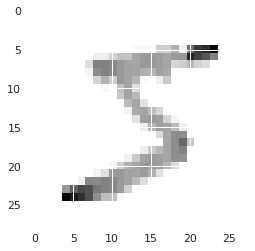

The first handwrittern digit is : 5


In [ ]:
plt.imshow(train_images[0],cmap=plt.cm.binary) # plot in greyscale
plt.show()
print('The first handwrittern digit is :',  train_labels[0])

# **Model training using Deep Neural Network**

In [ ]:
model_dnn=keras.models.Sequential(
    [keras.layers.Flatten(),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(128,activation=tf.nn.relu),
     keras.layers.Dense(10,activation=tf.nn.softmax),
    ]
)
model_dnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_dnn.fit(train_images, train_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4678 - accuracy: 0.8629
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9659
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9848
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0375 - accuracy: 0.9877
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9912
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.012

In [ ]:
validation_loss, validation_acc =model_dnn.evaluate(test_images,test_labels)
print('The validation loss is :',validation_loss)
print('The validation accuracy is :', validation_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.9773
The validation loss is : 0.12054707109928131
The validation accuracy is : 0.9772999882698059
